In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

install tensorflow:

In [2]:
#!pip install tensorflow
#!pip install --upgrade tensorflow  
# if needs to be updated

import tensorflow:

In [3]:
import tensorflow as tf

verify tensorflow version:

In [4]:
tf.__version__

'2.8.0'

Note that this is a recent version, integrated with kerasm

Import mnsit dataset which are of 28x28 handwritten images of digits (0-9):

In [5]:
mnist = tf.keras.datasets.fashion_mnist

In [6]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
type(mnist.load_data())

tuple

Load training data and labels:

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Take a peak at x_train and y_train:

In [9]:
x_train.shape

(60000, 28, 28)

So there are 60000 images, all are size 28 x 28

In [10]:
#x_train

In [11]:
y_train.shape

(60000,)

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

60000 labels indicating which category (digit) is on the images

We can visualize (plot) the images using plt.imshow:

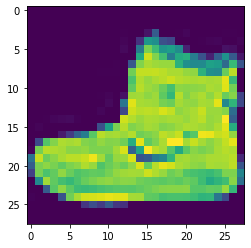

In [13]:
plt.imshow(x_train[0])
plt.show()

Lets look at a few more:

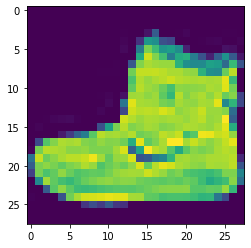

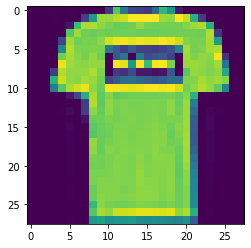

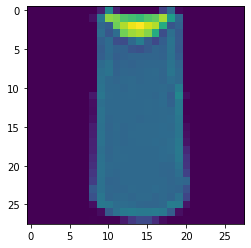

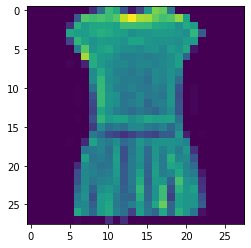

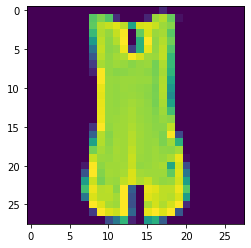

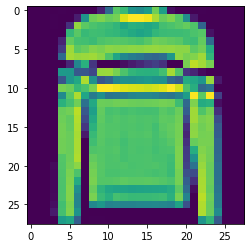

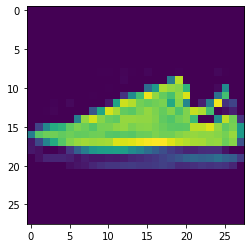

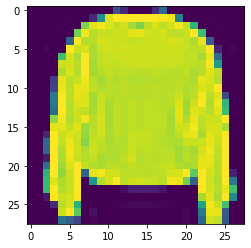

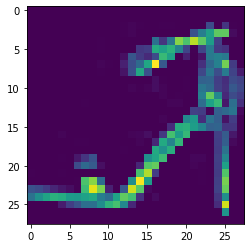

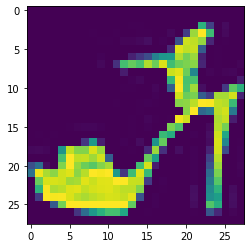

In [14]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.show()

Fix the color of the images:

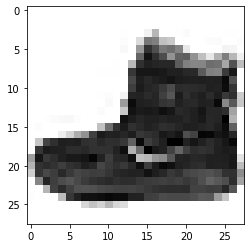

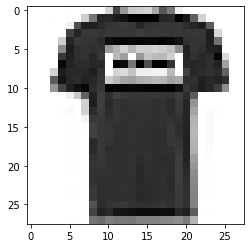

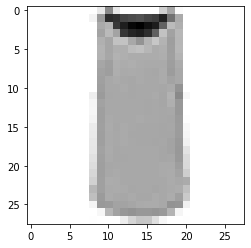

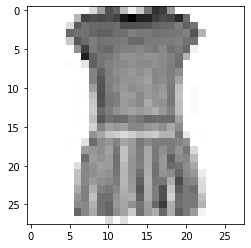

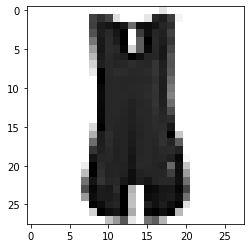

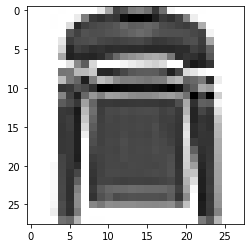

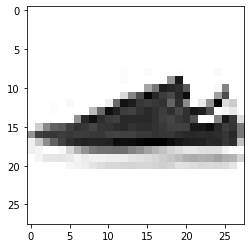

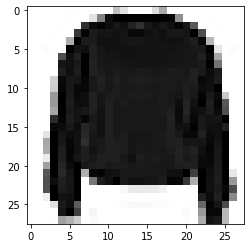

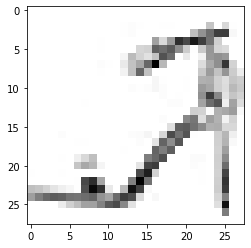

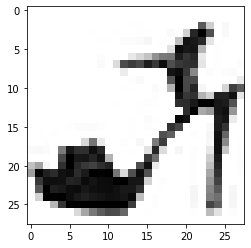

In [15]:
for i in range(10):
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.show()

Look at the data again:

In [16]:
#x_train[42]

Normalizing won't harm but help the model to learn faster.

Lets normalize the pixel values using minmax normalizer from keras:

In [17]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test,  axis=1)

In [18]:
#x_train[42]

Create a model using a Sequential model:

In [19]:
model = tf.keras.models.Sequential()

Add layers:

In [20]:
model.add(tf.keras.layers.Flatten())   # to flatten
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))   # 128 neurons, choose most commonly used activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)))   # add another such layer with regularization.
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) #add one more layer for increasing accuracy
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 10 classes (one per digit), choose softmax for probabilities

Parameterizing the model:

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

Now fit the model:

In [22]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5638 - accuracy: 0.8162
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4031 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3571 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3299 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3139 - accuracy: 0.8901


Model Summary:

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 64)                  8256      
                                                                 
 dense_3 (Dense)             (32, 10)                  650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


Retrieve evaluation metrics:

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 982us/step - loss: 0.3446 - accuracy: 0.8826


[0.3446412682533264, 0.8826000094413757]

Store them in variables:

In [25]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 987us/step - loss: 0.3446 - accuracy: 0.8826


In [26]:
print(val_loss, val_accuracy)

0.3446412682533264 0.8826000094413757


Training may not be as fast as in this example, lets save the model for future use:

In [27]:
model.save('saved_mnist_test.model')

INFO:tensorflow:Assets written to: saved_mnist_test.model\assets


In [28]:
saved_model_loaded = tf.keras.models.load_model('saved_mnist_test.model')

In [29]:
predictions = saved_model_loaded.predict([x_test])

In [30]:
predictions

array([[1.4320601e-03, 6.0415905e-06, 4.8863647e-05, ..., 4.3175615e-02,
        7.9476810e-04, 9.0024126e-01],
       [1.5253751e-03, 1.7635148e-06, 9.8643118e-01, ..., 4.0825819e-07,
        5.1259674e-05, 5.5194892e-07],
       [1.7269210e-04, 9.9967790e-01, 3.7700395e-06, ..., 6.1342430e-06,
        9.3011395e-06, 1.2351491e-07],
       ...,
       [3.8572887e-04, 7.0625902e-06, 8.7014296e-06, ..., 4.9731161e-06,
        9.9910396e-01, 2.4898256e-07],
       [8.0486650e-05, 9.9924636e-01, 1.0548996e-05, ..., 1.6953707e-05,
        1.9663476e-05, 2.5574030e-07],
       [3.7011363e-05, 9.3516574e-06, 7.3430419e-06, ..., 7.0471033e-03,
        1.6316745e-02, 1.6674661e-05]], dtype=float32)

In [31]:
np.round(predictions, 8)

array([[1.4320600e-03, 6.0399998e-06, 4.8860002e-05, ..., 4.3175619e-02,
        7.9477002e-04, 9.0024126e-01],
       [1.5253800e-03, 1.7600000e-06, 9.8643118e-01, ..., 4.1000001e-07,
        5.1260002e-05, 5.4999998e-07],
       [1.7268999e-04, 9.9967790e-01, 3.7699999e-06, ..., 6.1300002e-06,
        9.2999999e-06, 1.2000000e-07],
       ...,
       [3.8573000e-04, 7.0599999e-06, 8.6999999e-06, ..., 4.9700002e-06,
        9.9910402e-01, 2.5000000e-07],
       [8.0489997e-05, 9.9924630e-01, 1.0550000e-05, ..., 1.6950000e-05,
        1.9659999e-05, 2.6000001e-07],
       [3.7009999e-05, 9.3500003e-06, 7.3400001e-06, ..., 7.0471000e-03,
        1.6316740e-02, 1.6669999e-05]], dtype=float32)

1st prediction corresponds to 7, 2nd corresponds to 2

Using argmax from numpy:

In [32]:
np.argmax(predictions[0])

9

In [33]:
np.argmax(predictions[1])

2

Displaying the first 10 predictions:

In [34]:
for i in range(10):
    print(np.argmax(predictions[i]), end=' ')

9 2 1 1 6 1 4 6 5 7 

The prediction is: 9
The image:


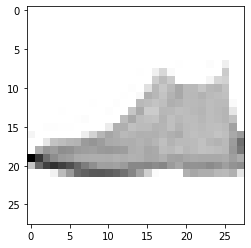

The prediction is: 2
The image:


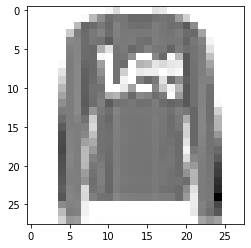

The prediction is: 1
The image:


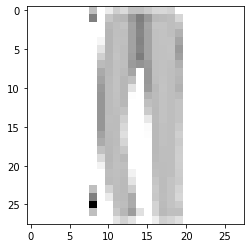

The prediction is: 1
The image:


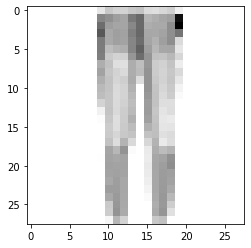

The prediction is: 6
The image:


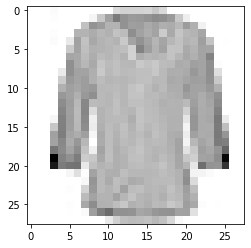

The prediction is: 1
The image:


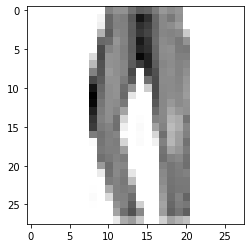

The prediction is: 4
The image:


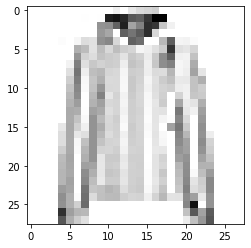

The prediction is: 6
The image:


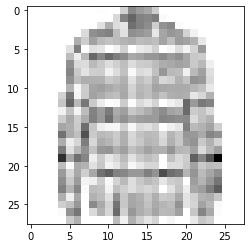

The prediction is: 5
The image:


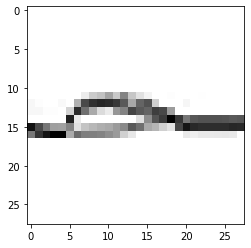

The prediction is: 7
The image:


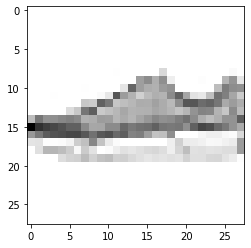

In [35]:
for i in range(10):
    print('The prediction is:', np.argmax(predictions[i]))
    print('The image:')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.show()

Display the configuration of the layers:

In [36]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bi